# Advertising Sales Prediction – Multiple Linear Regression (MLR)

In [1]:
# Designed by : ALTAF HUSAIN DATA ANALYST

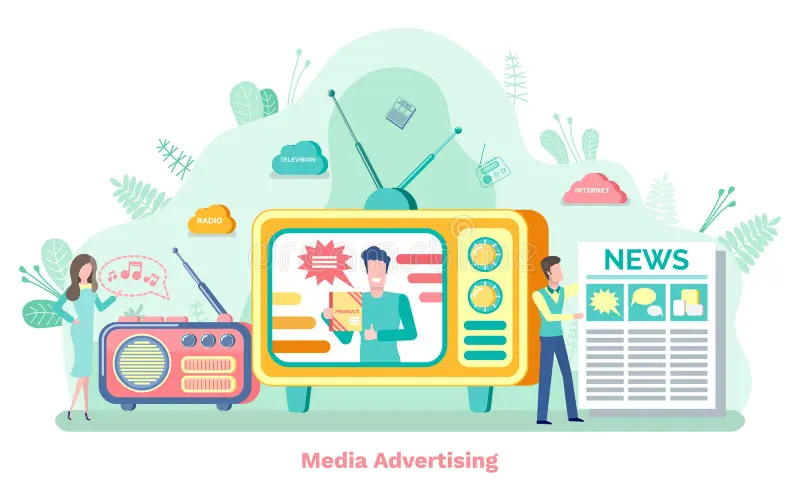

# Step 1 : load modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print("All module s loaded succesfully")

All module s loaded succesfully


# step 2 : load data

In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/data/advertising.csv")

In [4]:
# step 2.1 :
df.sample()

,ID,TV,Radio,Newspaper,Sales
154,155,187.8,21.1,9.5,15.6


In [5]:
df.drop('ID',axis = 1,inplace =True)

In [6]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
# step 2.2 :
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
# step 2.3 :
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [9]:
# step 2.4 :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# step 3 : EDA

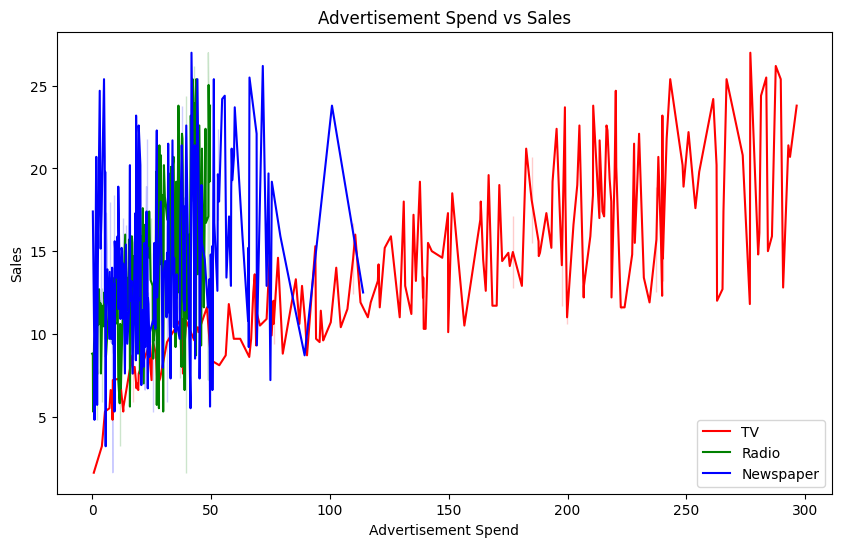

In [10]:
# setp 3.1 :
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="TV", y="Sales", label="TV", color="r")
sns.lineplot(data=df, x="Radio", y="Sales", label="Radio", color="g")
sns.lineplot(data=df, x="Newspaper", y="Sales", label="Newspaper", color="b")

plt.title("Advertisement Spend vs Sales")
plt.xlabel("Advertisement Spend")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [11]:
# step 3.2 :
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
# step 3.3 :
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# step 4 : Divide data into X and y

In [13]:
X = df.iloc[: ,:-1]
X.shape

(200, 3)

In [14]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
y = df['Sales']
y.shape

(200,)

In [16]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


# step 5 : Model Biulding

In [17]:
# step 5.1 :
lr_model = LinearRegression()

In [18]:
#  step 5.2 :
lr_model.fit(X,y)

LinearRegression()

In [19]:
# step 5.3 :
y_pred = lr_model.predict(X)

In [20]:
temp_df = df.copy()
temp_df['y_pred_sales'] = y_pred

In [21]:
temp_df

,TV,Radio,Newspaper,Sales,y_pred_sales
0,230.1,37.8,69.2,22.1,20.523974
1,44.5,39.3,45.1,10.4,12.337855
2,17.2,45.9,69.3,9.3,12.307671
3,151.5,41.3,58.5,18.5,17.597830
4,180.8,10.8,58.4,12.9,13.188672
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,5.370342
196,94.2,4.9,8.1,9.7,8.165312
197,177.0,9.3,6.4,12.8,12.785921
198,283.6,42.0,66.2,25.5,23.767321


# step 6 : Visualize actual vs predict

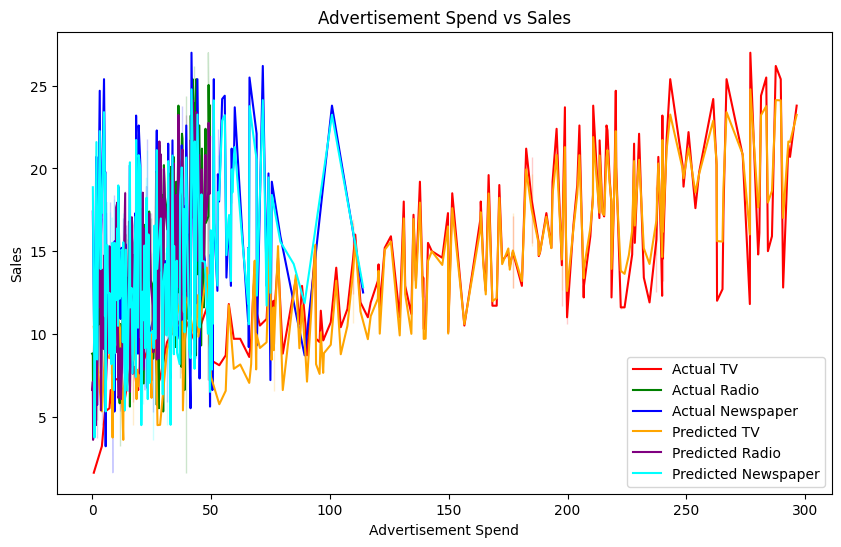

In [22]:
# setp 3.1 :
plt.figure(figsize=(10,6))
# Actual Sales
sns.lineplot(data=df, x="TV", y="Sales", label="Actual TV", color="red")
sns.lineplot(data=df, x="Radio", y="Sales", label="Actual Radio", color="green")
sns.lineplot(data=df, x="Newspaper", y="Sales", label="Actual Newspaper", color="blue")

# Predicted Sales
sns.lineplot(data=temp_df, x="TV", y="y_pred_sales", label="Predicted TV", color="orange")
sns.lineplot(data=temp_df, x="Radio", y="y_pred_sales", label="Predicted Radio", color="purple")
sns.lineplot(data=temp_df, x="Newspaper", y="y_pred_sales", label="Predicted Newspaper", color="cyan")

plt.title("Advertisement Spend vs Sales")
plt.xlabel("Advertisement Spend")
plt.ylabel("Sales")
plt.legend()
plt.show()


# step 7 : Checking MAE ,MSE and RMSE errors

In [23]:
# step 7.1 :
mae_sk = mean_absolute_error(y,y_pred)
print('Mean absolute error :',mae_sk)

Mean absolute error : 1.252011229687068


In [24]:
# step 7.2 :
mse = ((temp_df['Sales'] - temp_df['y_pred_sales'])** 2).mean()
print('Mean squared error :',mse)

Mean squared error : 2.784126314510936


In [25]:
# step 7.3 :
mse_sk = mean_squared_error(y,y_pred)
print('Mean squared error :',mse_sk)

Mean squared error : 2.784126314510936


In [26]:
# step 7.4 :
rmse = mse ** 0.5
print('root Mean squared error :',rmse)

root Mean squared error : 1.6685701407225697


In [27]:
# step 7.5 :
rmse_sk = root_mean_squared_error(y,y_pred)
print('Root Mean squared error :',rmse_sk)

Root Mean squared error : 1.6685701407225697


In [28]:
# Step 7.6 : model score
model_score = lr_model.score(X,y) # this is model learing score (almost 89 %)
model_score = round(model_score * 100,2)
print('Model has achieved learing score:',model_score)

Model has achieved learing score: 89.72


# step 8 : Future predict for next 4 sales

In [29]:
future_tv = list(range(230, 270, 10))        # example future TV spends
future_radio = list(range(35, 55, 5))       # example future Radio spends
future_newspaper = list(range(20, 40, 5))   # example future Newspaper spends

future_X = pd.DataFrame({"TV": future_tv,"Radio": future_radio,"Newspaper": future_newspaper})

In [30]:
future_X["y_pred_sales"] = lr_model.predict(future_X[["TV", "Radio", "Newspaper"]])

# step 9 : Visualize Past and future values

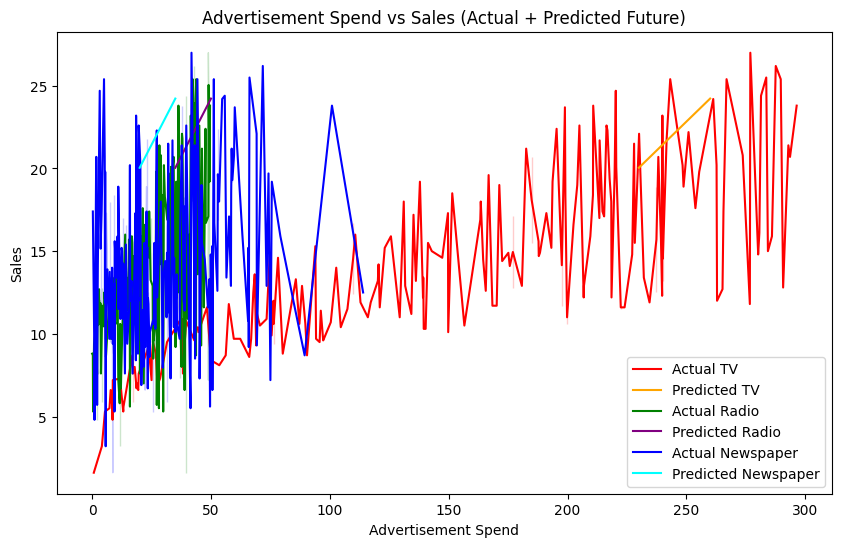

In [31]:
plt.figure(figsize=(10,6))

features = ["TV", "Radio", "Newspaper"]
actual_colors = ["red", "green", "blue"]
predicted_colors = ["orange", "purple", "cyan"]

for i, feature in enumerate(features):
    # Actual Sales
    sns.lineplot(data=df, x=feature, y="Sales", label=f"Actual {feature}", color=actual_colors[i])

    # Predicted Sales
    sns.lineplot(data=future_X, x=feature, y="y_pred_sales", label=f"Predicted {feature}", color=predicted_colors[i])

plt.title("Advertisement Spend vs Sales (Actual + Predicted Future)")
plt.xlabel("Advertisement Spend")
plt.ylabel("Sales")
plt.legend()
plt.show()

# step 10 : Input from where user can ask and predict sales based on the features

In [32]:
tv = float(input("Enter TV ad spend: "))
radio = float(input("Enter Radio ad spend: "))
newspaper = float(input("Enter Newspaper ad spend: "))

user_input = [[tv, radio, newspaper]]
predicted_sales = lr_model.predict(user_input)
predicted_sales_value = round(predicted_sales[0], 2)

print(f"Predicted Sales: {predicted_sales_value}(US$)")

Enter TV ad spend: 200
Enter Radio ad spend: 300
Enter Newspaper ad spend: 250
Predicted Sales: 68.39(US$)


In [33]:
# Designed by : ALTAF HUSAIN DATA ANALYST